# Data-driven Business and Behaviour Analytics (DBBA)
# Lab session: 1 - First steps with NetworkX

The Python package we will use to study and analyse networks is [NetworkX](https://networkx.org/documentation/stable/). Here we cover some basic examples.

To install the package, you can install the conda environment available on the website (the *.yml* file) following these instructions:
- using your terminal, navigate to the folder containing the environment file
- write on your terminal `conda env create -f dbba_env.yml`
- always activate the environment before using your IDE or jupyter-notebook, using `conda activate dbba_env` on your terminal

*NOTE* If for any reason you cannot make the environment work, you can install the python packages normally by running `conda install networkx` or, from a jupyter-notebook,

In [27]:
# conda install --yes numpy pandas networkx matplotlib

Once installed, to load the module into your Python session you have to use the `import` statement. Note also that you can use a short alias to enhance performance.

In [28]:
import networkx as nx

After loading the package, we double-check the version to be safe we will use the last available version.

In [29]:
nx.__version__

'3.1'

In [30]:
%matplotlib inline 
# this just to make the plots be plotted here creating no new windows 

## Creating and plotting our first network

Here we create the basic object of the NetworkX library, the `Graph`, which is an undirected network. 

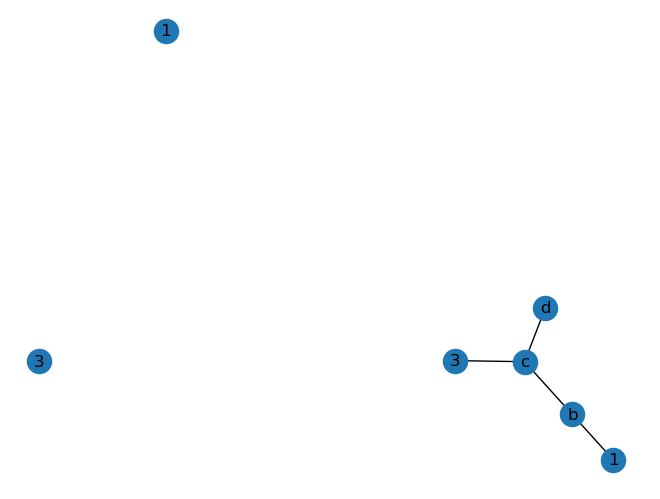

In [31]:
# creating the Graph object
G = nx.Graph()

# Once created, the network is empy. Let's add some nodes!
# We could do that in two different ways: first, adding them one by one
G.add_node(1)
G.add_node(3)

# Second, creating a list of nodes and using it
nodes_to_add = ['b', 'c', 'd']
G.add_nodes_from(nodes_to_add)

# Studying nodes only provides generally little information on them. The benefit of studying 
# networks lies in the connections that arise. Let's build some links in our network!
# Again, we have two ways: first, adding links one by one
G.add_edge('1', 'b')

# or from a list of 2-dimensional tuples
edges_to_add = [('3', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(edges_to_add)

# note that the order (first or second place in a link) doesn't matter as we are dealing with undirected networks

# draw the graph
nx.draw(G, with_labels=True)

The plot can be customized in many ways by modifying the arguments in `draw`. [Here](https://networkx.org/documentation/stable//reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw) a comprehensive guide.

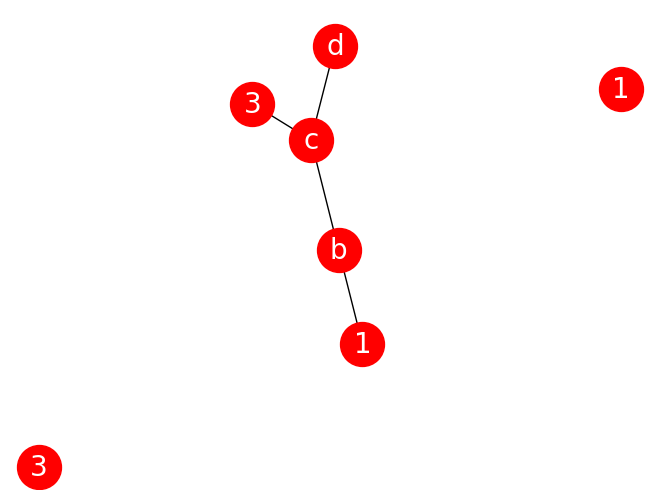

In [32]:
nx.draw(G,
        with_labels=True,
        node_color='red',
        node_size=1000,
        font_color='white',
        font_size=20,
        )

## Examining the properties of a network

A Graph object has several methods and properties which provide precious information.

In [33]:
# List all of the nodes
G.nodes()

NodeView((1, 3, 'b', 'c', 'd', '1', '3'))

In [34]:
# List all of the edges
G.edges()

EdgeView([('b', '1'), ('b', 'c'), ('c', '3'), ('c', 'd')])

NodeView and EdgeView objects behave exactly like a list: you can iterate over them with a for loop.

In [35]:
for edge in G.edges:
    print(edge)

('b', '1')
('b', 'c')
('c', '3')
('c', 'd')


In some cases, it can be useful to retrieve how many links or nodes a network has.

In [36]:
G.number_of_nodes()

7

In [37]:
G.number_of_edges()

4

Or, for instance, which other nodes a node is connected to. Note: for performance reasons, `neighbors()` returns an iterator which we make a list using `list()`.

In [38]:
G.neighbors('c')

In [39]:
list(G.neighbors('c'))

['3', 'b', 'd']

Or you can find convenient to loop over:

In [40]:
for neighbor in G.neighbors('b'):
    print(neighbor)

1
c


If we do not know whether a node is in a giant network or whether it is connected to another given node, we could use `has_node()` or `has_edge()`.

In [41]:
G.has_node('f')

False

Even if rough, an estimate of the importance of a given a node in a network is its degree, which we compute in the following way.

In [42]:
G.degree('d')

1

## NetworkX functions vs. Graph methods

The previous data are available via graph *methods*, *i.e.* they are called from the graph object:

    G.<method_name>(<arguments>)

While several of the most-used NetworkX functions are provided as methods, many more of them are module functions and are called like this:

    nx.<function_name>(G, <arguments>)

that is, with the graph provided as the first, and maybe only, argument. Here are a couple of examples of NetworkX module functions that provide information about a graph:

In [43]:
nx.is_tree(G)

False

In [44]:
nx.is_connected(G)

False

# **EXERCISE 1**
Often in the context of trees, a node with degree 1 is called a *leaf*. Write a function named `get_leaves` that takes a graph as an argument, loops through the nodes, and returns a list of nodes with degree 1.

## Our Solution

When provided with no arguments, `G.degree()` returns an iterator over all `(node, degree)` pairs in a graph.
We can simply use the condition of a list comprehension, to filter the list down to only the nodes where `degree == 1`.

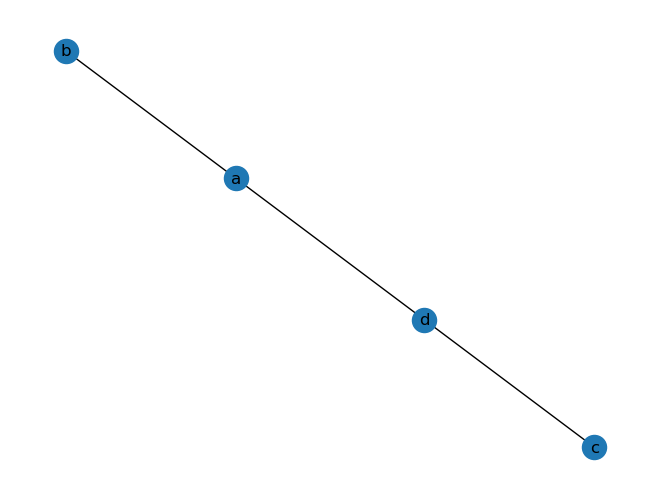

In [53]:
def get_leaves(G):
  return [n for n, d in G.degree() if d == 1]


G = nx.Graph()
G.add_edges_from([
    ('a', 'b'),
    ('a', 'd'),
    ('c', 'd'),
])

assert set(get_leaves(G)) == {'c', 'b'}

nx.draw(G, with_labels=True)

## Directed networks: the DiGraph object


Some types of networks require more than a bunch of symmetric relationships e.g., a causality link or a air flight. NetworkX provides the `DiGraph` class for directed graphs with additional methods and properties specific to directed edges.


In [46]:
DirG = nx.DiGraph()

DirG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)]) # note: a link can be weighted 
# through the third element of the tuple

In [47]:
DirG.out_degree(1, weight='weight')

0.5

In [48]:
DirG.degree(1, weight='weight')

1.25

Being directed, the concepts of neighbour or of degree lose importance. New ideas (but easily translatable from the undirected case) of __predecessors/successors__ and __in-degree/out-degree__ came up, which only refers to __in-links/out-links__. 

In [49]:
list(DirG.successors(1))

[2]

In [50]:
DirG.in_degree(1)

1

## Reading and writing networks

In real-world data, networks can be very large. Because of this, compact ways to store information related to nodes and links have to be found. NetworkX provides a few.

### Adjacency list

The adjacency list format consists of lines with node labels. The first label in a line is the source node. Further labels in the line are considered target nodes and are added to the graph along with an edge between the source node and target node.

```
a b c # source target target
d e
```

### Edge list

Similarly, `read_edgelist()` can read a list of edges, with the drawback of the impossibility of representing isolated nodes unless the node has a self-loop edge.

# **EXERCISE 2**

Write a function `max_degree` that takes a graph as its argument, and returns a 2-tuple with the name and degree of the node with highest degree.

## Our Solution

As with exercise 1, we use `G.degree()` with no arguments to iterate over all `(node, degree)` pairs.
The utility function `max` can be used to find the value with the maximum value with respect to a user provided `key` function.
Which for us is simply the second value of the `(node, degree)` tuple.

In [51]:
def max_degree(G):
  return max(G.degree(), key = lambda p: p[1])

assert max_degree(G) == ('a', 2)

# **EXERCISE 3**

Build a correlation network based from the last year's FTSE 100 adjusted returns (ret_adjusted.csv), by using Pearson correlation. Filter it using the Minimum Spanning Tree algorithm (with `nx.minimum_spanning_tree()`). Identify the node with the maximum degree using the function just written. Check whether there are leaves.


## Our solution

The `pandas` library provides a lot of useful functionality for manipulating data tables.
Here we exploit its functions for reading csv files (`pd.read_csv`) and computing Pearson correlation coefficients (`pd.DataFrame.corr`).
We also take the opportunity to shorten the column headings before we convert the adjacency matrix into a fully connected networkx Graph.


In [55]:
import pandas as pd


G_corr = nx.from_pandas_adjacency(
    pd.read_csv('retadjusted.csv')
    .set_index('ret.adjusted.prices.ref.date')
    .rename(columns = lambda k: k.split('.')[3])
    .corr()
)


In [56]:
tree_min = nx.minimum_spanning_tree(G_corr)

print('Max Degree:', max_degree(tree_min))
print('Num. Leaves:', len(get_leaves(tree_min)))

Max Degree: ('RKT', 22)
Num. Leaves: 80


Networkx contains a library function `nx.minimum_spanning_tree` to find a minimum spanning tree of a graph.
By default, it minimizes the `weight` attribute of each edge, which is conveniently what the correlation values were named.
We can now reuse our functions `max_degree` and `get_leaves` to find the information we are asked for.

# **EXERCISE 4**

Repeat exercise 3 but using `nx.maximum_spanning_tree()` instead. Plot both networks, and compare them. Write a list of 5 nodes with highest degree in both cases. Are there any differences? If so, why? 

## Our Solution

Networkx has a corresponding library function for the maximum spanning tree which we can use.
We can calculate the max degree and leaves as before.


In [ ]:
tree_max = nx.maximum_spanning_tree(G_corr)

print('Max Degree:', max_degree(tree_max))
print('Num. Leaves:', len(get_leaves(tree_max)))


def highest_degree(G, k = 5):
  return sorted(
    [(n, G.degree(n)) for n in G.nodes],
    key = lambda pair: pair[1],
    reverse = True)[:k]


print("\nMin:", highest_degree(tree_min))
print("Max:", highest_degree(tree_max))

Max Degree: ('LGEN', 9)
Num. Leaves: 46

Min: [('RKT', 22), ('JET', 12), ('RR', 11), ('OCDO', 10), ('BME', 7)]
Max: [('LGEN', 9), ('EXPN', 6), ('HLMA', 6), ('RTO', 6), ('AV', 5)]


We can observe that the maximum degree in the network has changed dramatically, as have the five nodes with the largest degree.
By definition, each tree must have the same number of nodes and edges to be valid spanning trees of the same network.
Thus, increasing the number of nodes with high degree necessarily reduces the available edges for lower degree nodes, likely responsible for the increasing amount of leaves.

The effect can be seen when plotting the networks, which we achieve using networkx's `nx.draw` function.
We use spring layout to organize both trees.
However, the low weights of the minimum spanning tree can cause nodes to become bunched up, thus we need to ensure these are ignored.

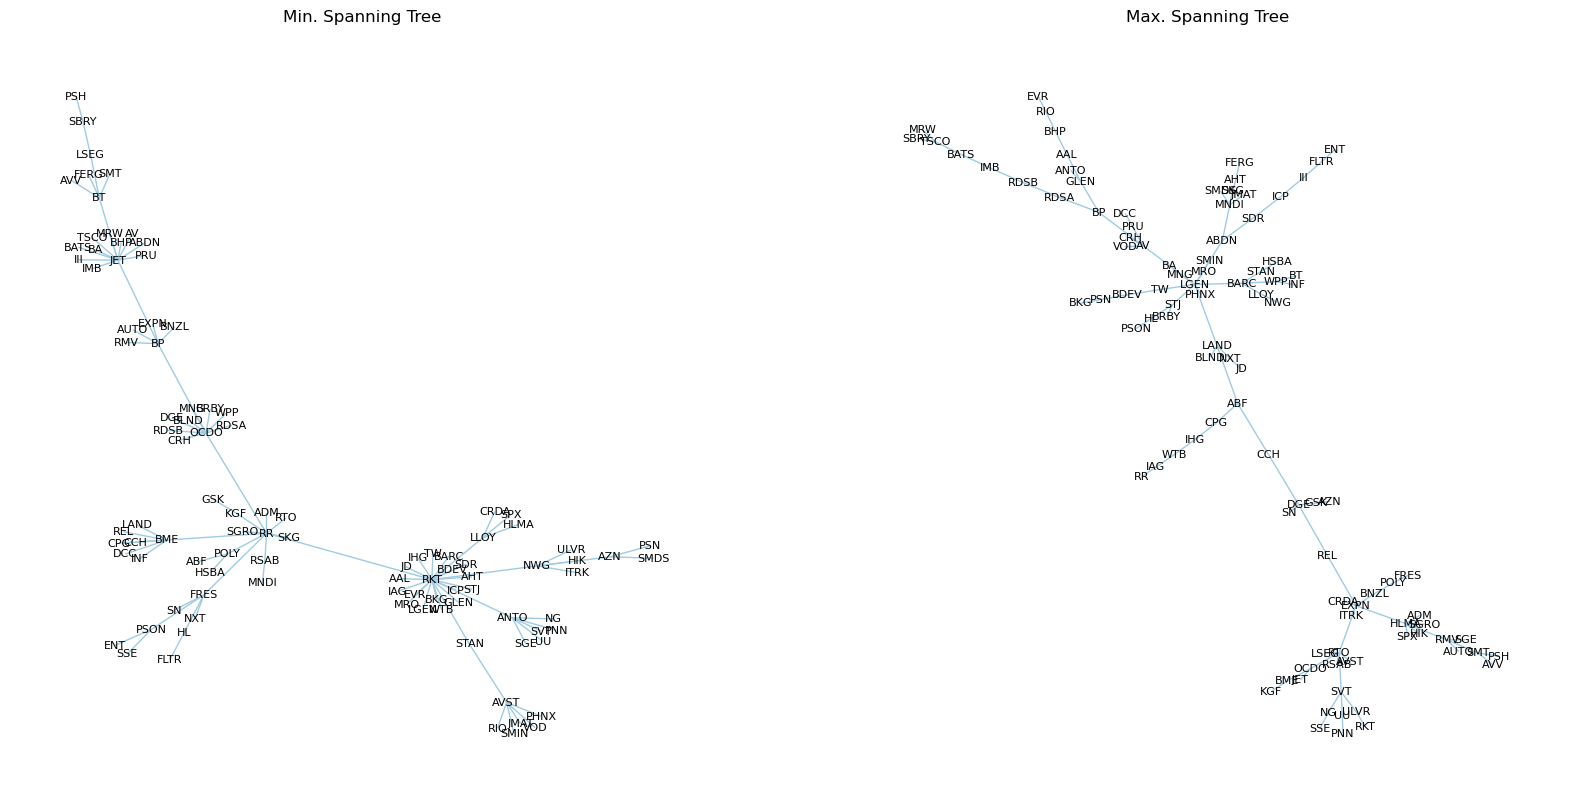

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl


def draw_tree(G):
  nx.draw(
    G,
    pos = nx.spring_layout(G, 
      iterations = 500, 
      weight = None), # Low weights of min spanning tree hinder plotting.
    node_size = 0,
    with_labels = True,
    font_color = 'black',
    font_size = 8,
    edge_color = '#A0CBE2')


plt.figure(figsize = (20, 10))

plt.subplot(1, 2, 1)
plt.title('Min. Spanning Tree')
draw_tree(tree_min)

plt.subplot(1, 2, 2)
plt.title('Max. Spanning Tree')
draw_tree(tree_max)
plt.show()

The highest degree nodes of the minimum spanning tree (RKT, JET, RR, OCDO, and BME) are all clearly visible by the cluster of nodes around them.
By contrast, the maximum spanning tree contains longer chains of nodes, made possible with a greater number of nodes with two neighbours (shown below).
This is caused by the relative lack of nodes with low _strength_ (the sum of the incident edges' weight) in the original correlation network.
Edges to these nodes will be disproportionately represented in the minimum spanning tree, thus they have higher degree.

Financial insights: A quick Google search tells us that the node with the highest degree in the minimum spanning tree is Reckitt Benckiser Group Plc (RKT), whereas the node with the highest degree in the maximum spanning tree is Legal and General (LGEN). 

If we investigate the sector these companies operate in, we find that LGEN is a asset management company offering insurance and pension funds. For these reasons, LGEN holds large quantities of stocks of the other companies listed. It becomes then clear why LGEN share price is highly correlated to the others and so central in the tree! By contrast, RKT is a consumer goods company. Businesses dealing with consumer goods are famously less correlated with the rest of the market.

In short, our analysis tells us that we should buy RKT stocks if the market is not performing well (or if we need less exposure to volatility) and that we should buy LGEN if we want to maximise our profits during long bull markets. This is something that most investment experts recommend, with the difference that it took them decades of experience to come to this conclusion, whereas it only took us less than an hour and little financial insight to do the same! This is the power of networks!

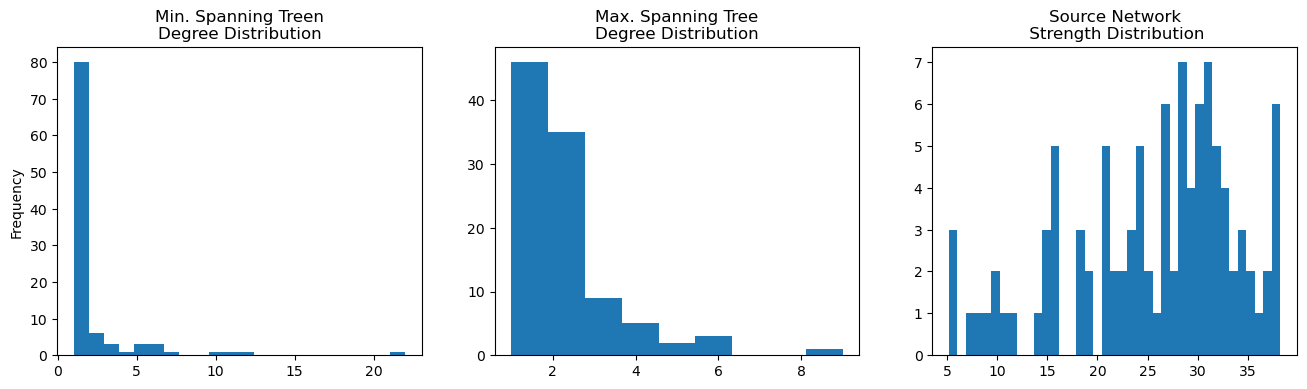

In [ ]:
plt.figure(figsize = (16, 4))

def plot_degree_hist(G, weight = None):
    from math import ceil
    degrees = [deg for _, deg in G.degree(weight = weight)]
    plt.hist(degrees, bins = ceil(max(degrees)))

plt.subplot(1, 3, 1)
plt.title('Min. Spanning Treen\nDegree Distribution')
plt.ylabel('Frequency')
plot_degree_hist(tree_min)

plt.subplot(1, 3, 2)
plt.title('Max. Spanning Tree\nDegree Distribution')
plot_degree_hist(tree_max)

plt.subplot(1, 3, 3)
plt.title('Source Network\n Strength Distribution')
plot_degree_hist(G_corr, 'weight')

plt.show()

In [ ]:
print("Bottom 10 strength nodes:", "".join(
  f"\n{rank+1:>2}) {node:>4},{strength:>6.2f} str" 
  for rank, (node, strength) in enumerate(sorted(
    G_corr.degree(weight = 'weight'), 
    key = lambda pair: pair[1])[:10]
  )
))

Bottom 10 strength nodes: 
 1)  JET,  5.17 str
 2)  RKT,  5.79 str
 3) AVST,  5.81 str
 4) RSAB,  7.19 str
 5) OCDO,  7.94 str
 6)  BME,  8.63 str
 7) FRES,  9.82 str
 8)  AZN, 10.16 str
 9) POLY, 10.28 str
10)  MRW, 11.52 str
